In [19]:
import pandas as pd
import numpy as np

In [20]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [54]:
from matplotlib import pyplot as plt

In [195]:
accept_raw = pd.read_csv('lending-club/accepted_2007_to_2016.csv')

### Date manipulation

In [196]:
accept_raw['issue_date'] = pd.to_datetime(accept_raw['issue_d'])

In [203]:
from datetime import datetime as dt
from datetime import timedelta

In [198]:
accept_raw['issue_year'] = accept_raw['issue_date'].dt.year

In [199]:
accept_raw['issue_month'] = accept_raw['issue_date'].dt.month

In [200]:
accept_raw['issue_d'] = accept_raw['issue_date'].apply(lambda x: str(x)[:7])

In [201]:
accept_raw['term'] = accept_raw['term'].apply(lambda x: int(x.split()[0]))

In [232]:
accept_raw['last_pymnt_date'] = pd.to_datetime(accept_raw['last_pymnt_d'])

In [271]:
accept_raw[accept_raw['last_pymnt_d'].isna()].head().T

,26,2731,3625,3998,4220
id,1069800,1032519,1016039,1009833,1006579
member_id,1.30468e+06,1.26216e+06,1.24372e+06,1.23659e+06,1.23299e+06
loan_amnt,15000,8000,6400,18000,1800
funded_amnt,15000,8000,6400,18000,1800
funded_amnt_inv,8725,3975,6400,18000,1800
term,36,36,60,60,36
int_rate,14.27,14.65,18.25,19.03,8.9
installment,514.64,275.96,163.39,467.23,57.16
grade,C,C,D,E,A
sub_grade,C2,C3,D5,E2,A5


In [272]:
accept_raw['paid_months'] = (accept_raw['last_pymnt_date'].dt.year - accept_raw['issue_date'].dt.year) * 12 + accept_raw['last_pymnt_date'].dt.month - accept_raw['issue_date'].dt.month

In [240]:
accept_raw.head().T

,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
member_id,1.2966e+06,1.31417e+06,1.31352e+06,1.27718e+06,1.31175e+06
loan_amnt,5000,2500,2400,10000,3000
funded_amnt,5000,2500,2400,10000,3000
funded_amnt_inv,4975,2500,2400,10000,3000
term,36,60,36,36,60
int_rate,10.65,15.27,15.96,13.49,12.69
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


### Question
- How does the issued loans vary year after year?
- What are the purposes of applying **Lending Club** loans?
- Do you observe different loan grade patterns for different loan purposes?
- Do you observe different loan grade patterns in different years?
- How about loan counts stratified into years and loan purposes/loan grades?

In [94]:
accept_raw['issue_year'] = accept_raw['issue_d'].apply(lambda x: x[4:])

In [156]:
def getDistribution(df, primary_key, secondary_key):
    cnt = df[primary_key].value_counts()
    print('Count by primary key: ', primary_key)
    print(cnt)
    print('------------------------------------')
    df_count1 = pd.DataFrame(df.groupby([primary_key, secondary_key]).count().iloc[:, 0])
    print('Count by {} (primary key) and {} (secondary key)'.format(primary_key, secondary_key))
    print(df_count1)
    print('------------------------------------')
    df_cnt_unstk_resetIdx = df_count1.unstack().reset_index()
    for val in sorted(accept_raw[primary_key].unique()):
        df_cnt_unstk_resetIdx[df_cnt_unstk_resetIdx[primary_key] == val]['id'].plot.bar(title = val)
        

Count by primary key:  purpose
debt_consolidation    773152
credit_card           297803
home_improvement       83016
other                  71365
major_purchase         27683
small_business         15168
medical                13981
car                    13677
moving                  8644
vacation                7998
house                   5709
wedding                 2349
renewable_energy         879
educational              423
Name: purpose, dtype: int64
------------------------------------
Count by purpose (primary key) and grade (secondary key)
                              id
purpose            grade        
car                A        3458
                   B        4300
                   C        3431
                   D        1587
                   E         648
                   F         208
                   G          45
credit_card        A       72637
                   B      106474
                   C       75331
                   D       29133
            

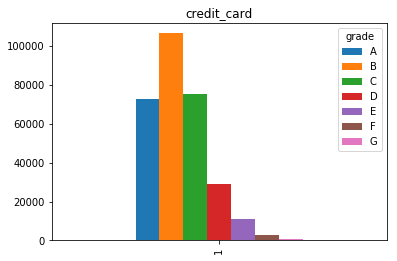

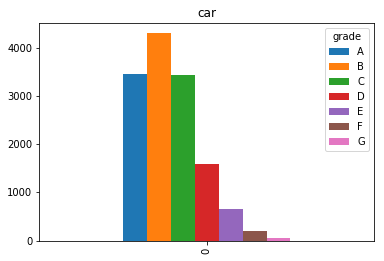

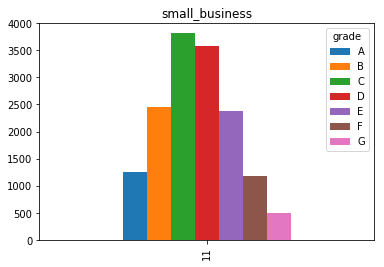

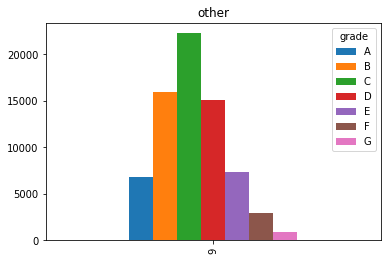

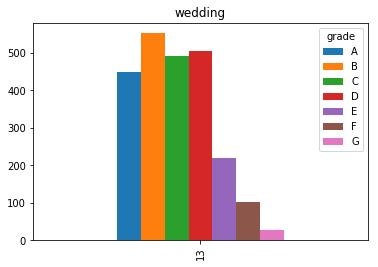

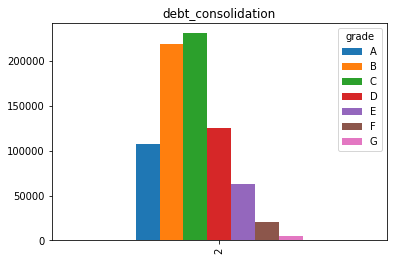

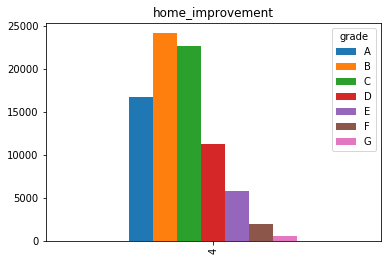

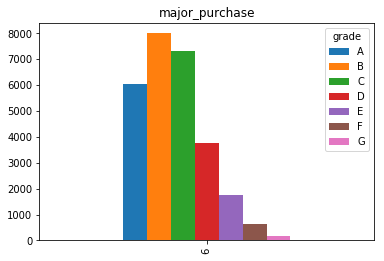

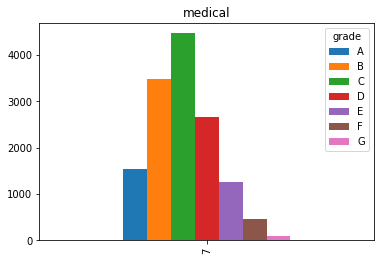

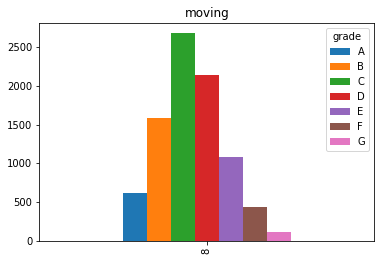

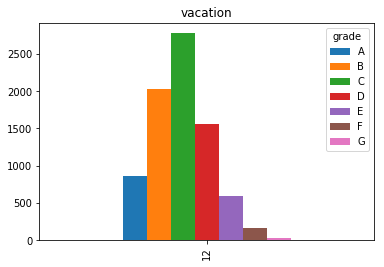

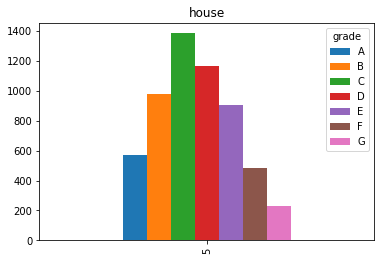

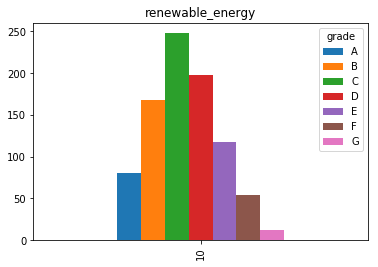

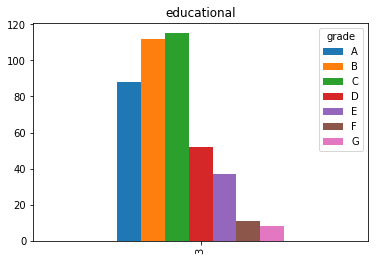

In [116]:
df = accept_raw
primary_key = 'purpose'
secondary_key = 'grade'
getDistribution(df, primary_key, secondary_key)

Count by primary key:  issue_year
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_year, dtype: int64
------------------------------------
Count by issue_year (primary key) and grade (secondary key)
                      id
issue_year grade        
2007       A          78
           B          98
           C         141
           D          99
           E         100
           F          52
           G          35
2008       A         318
           B         594
           C         580
           D         419
           E         285
           F         111
           G          86
2009       A        1203
           B        1445
           C        1348
           D         817
           E         308
           F         105
           G          55
2010       A        2830
           B        3687
           C        2729
           D        1885
           E 

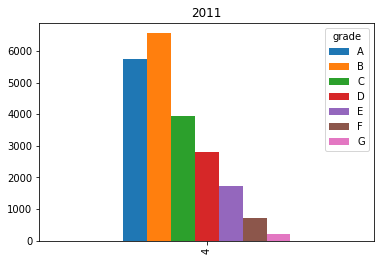

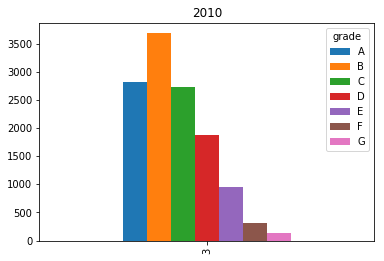

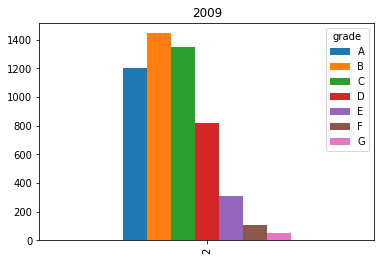

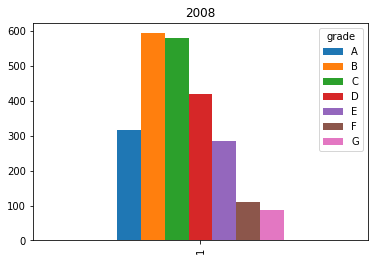

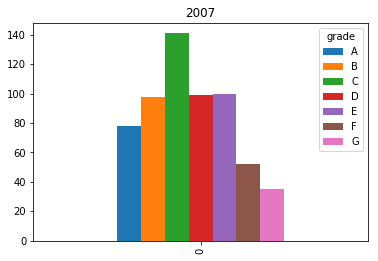

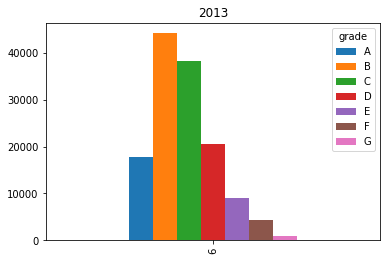

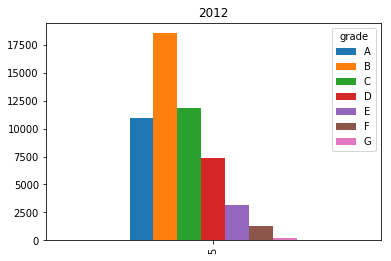

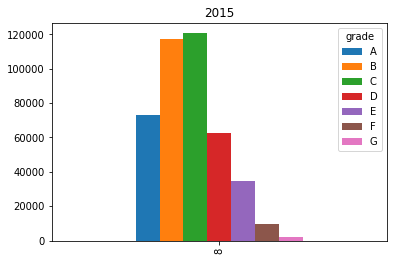

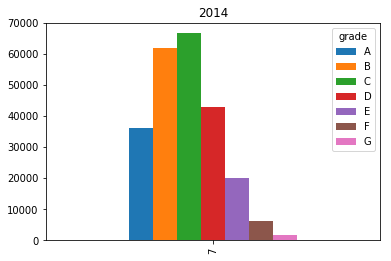

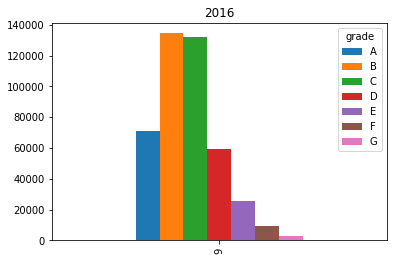

In [117]:
df = accept_raw
primary_key = 'issue_year'
secondary_key = 'grade'
getDistribution(df, primary_key, secondary_key)

Count by primary key:  issue_year
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_year, dtype: int64
------------------------------------
Count by issue_year (primary key) and purpose (secondary key)
                                   id
issue_year purpose                   
2007       car                     13
           credit_card             87
           debt_consolidation     207
           educational             36
           home_improvement        36
           house                    8
           major_purchase          10
           medical                  9
           moving                  15
           other                  113
           small_business          56
           vacation                 4
           wedding                  9
2008       car                     54
           credit_card            399
           debt_consolidation     976
  

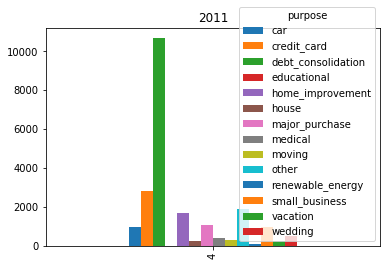

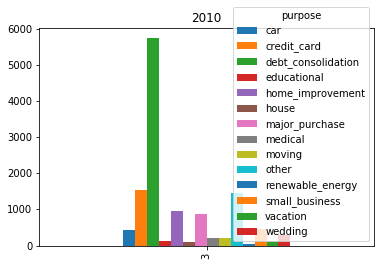

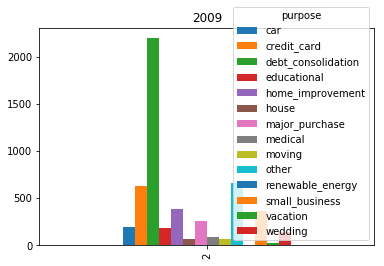

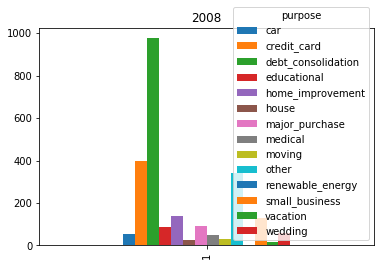

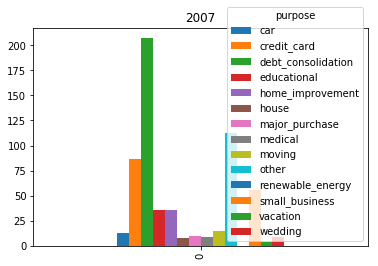

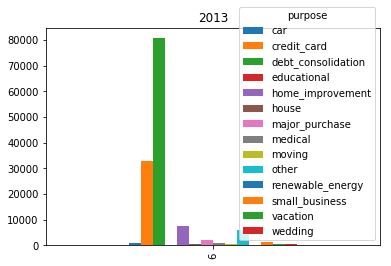

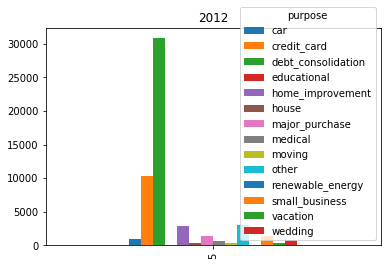

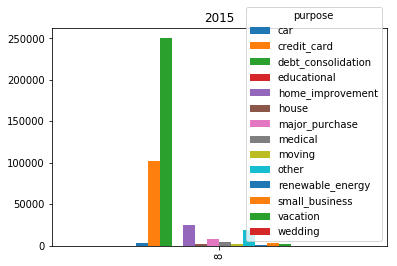

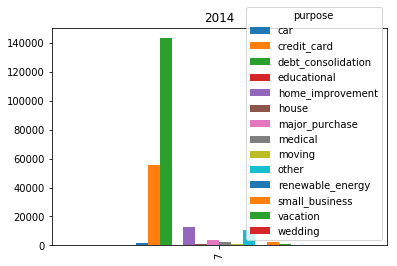

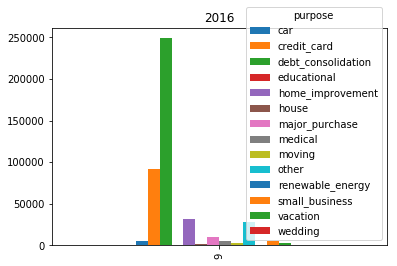

In [118]:
df = accept_raw
primary_key = 'issue_year'
secondary_key = 'purpose'
getDistribution(df, primary_key, secondary_key)

### Question
- How are the loan amounts/funded amounts distributed?
- Are there variations across different loan purposes, loan grades, etc?
- Are loans with higher funded amounts harder to be paid-in-full?

In [119]:
accept_raw.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'issue_year'],
      dtype='object', length=111)

Text(0.5, 1.0, 'Loan Amount')

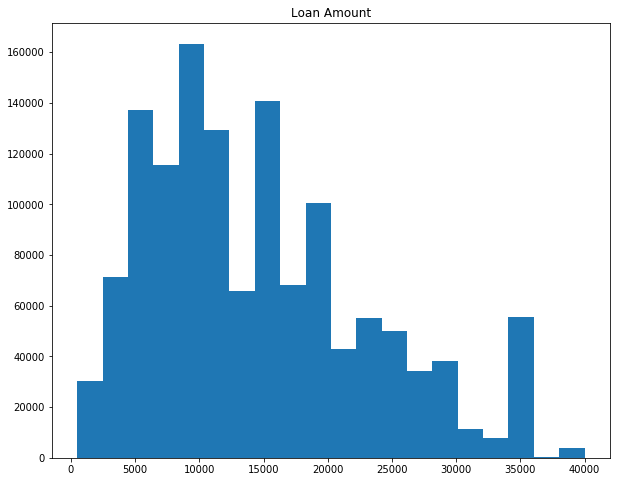

In [137]:
plt.figure(figsize = (10, 8))
_ = plt.hist(accept_raw['loan_amnt'], bins = 20)
plt.title('Loan Amount', fontdict=None, loc='center')

Text(0.5, 1.0, 'Funded Amount')

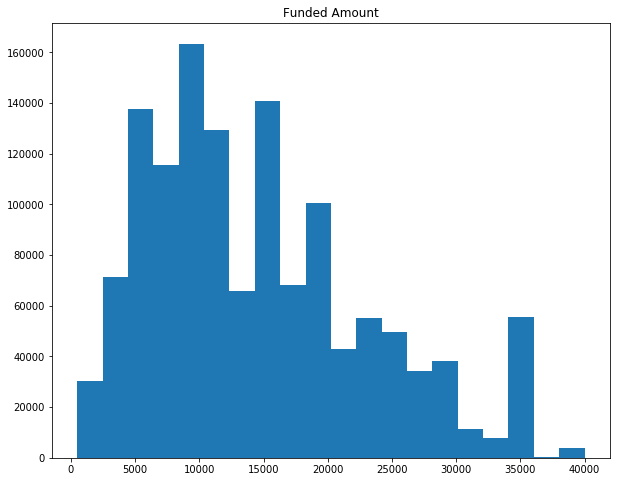

In [138]:
plt.figure(figsize = (10, 8))
_ = plt.hist(accept_raw['funded_amnt'], bins = 20)
plt.title('Funded Amount', fontdict=None, loc='center')

### distribution across different purposes or grades

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


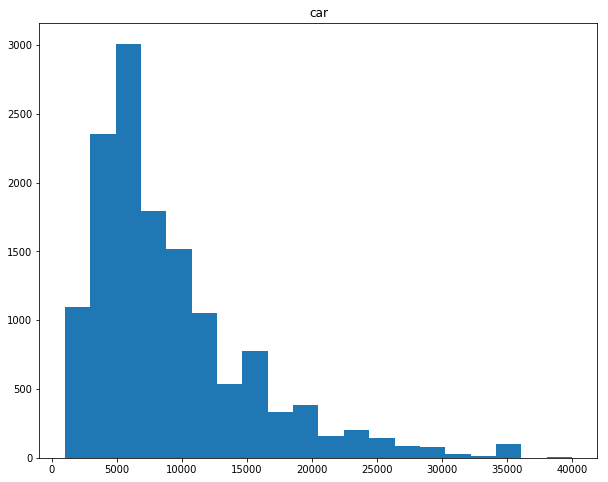

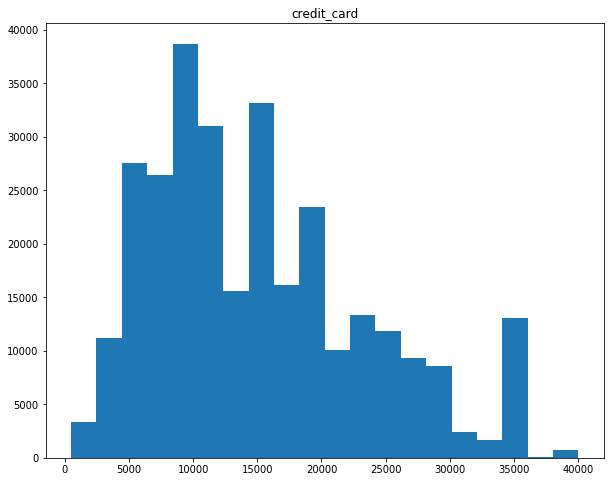

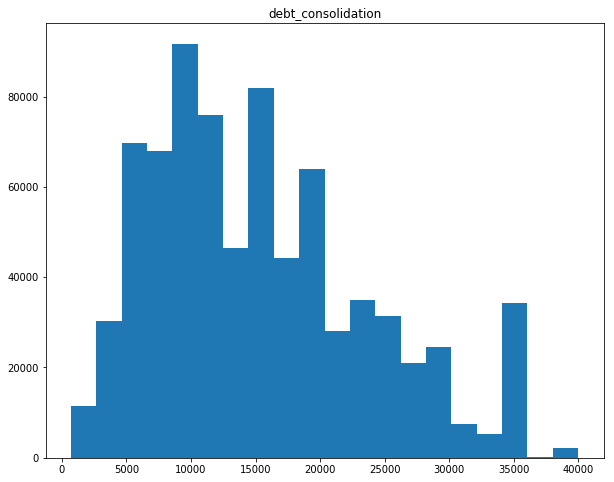

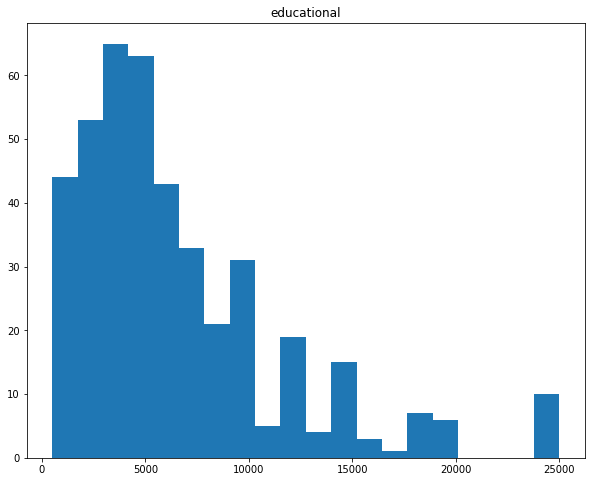

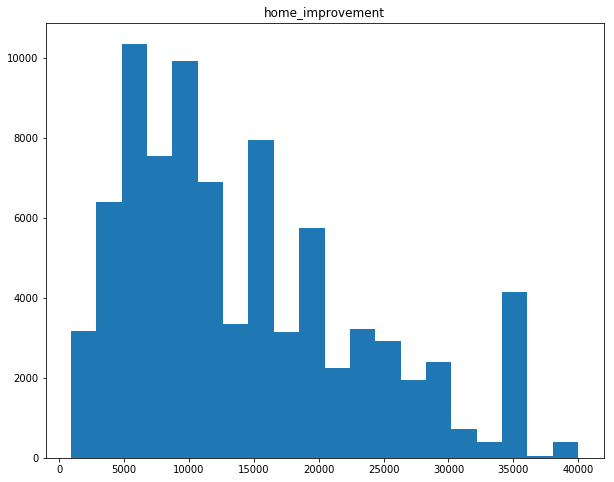

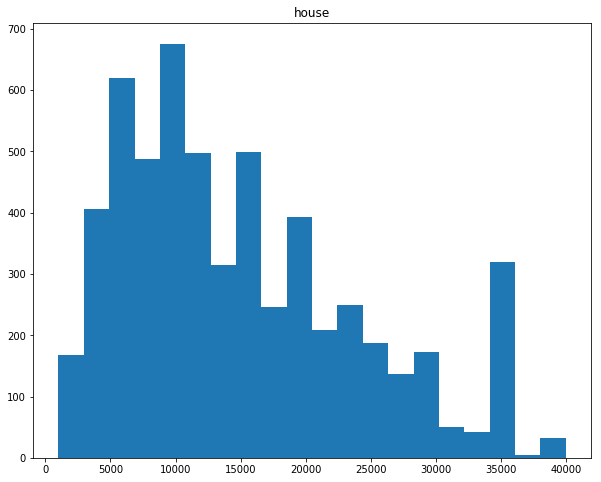

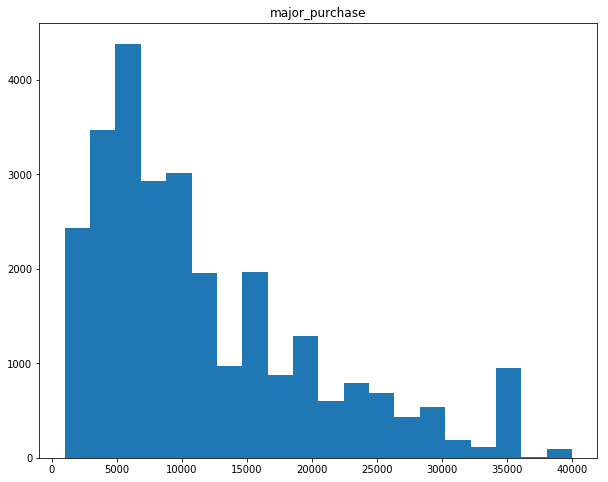

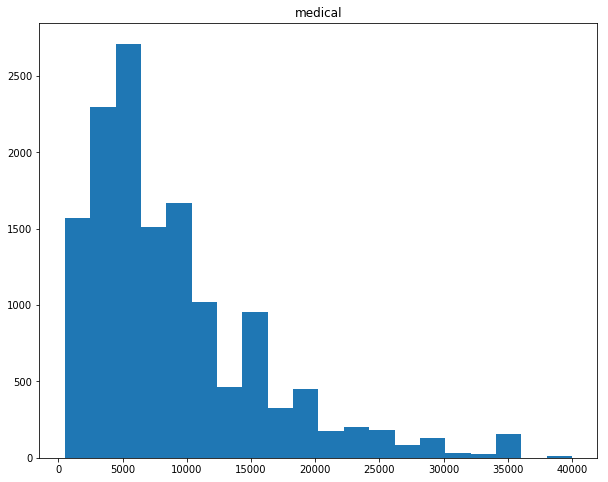

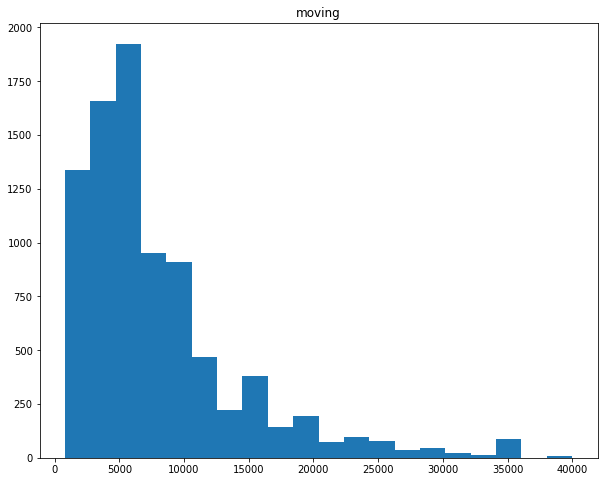

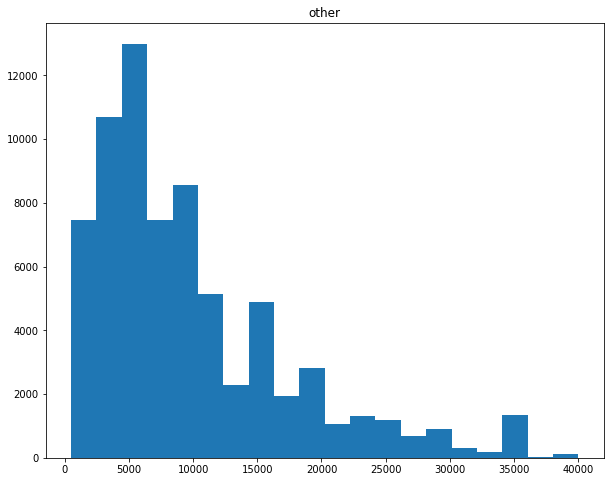

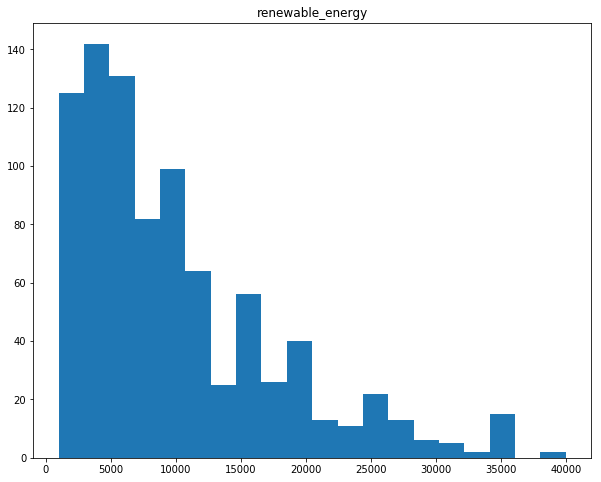

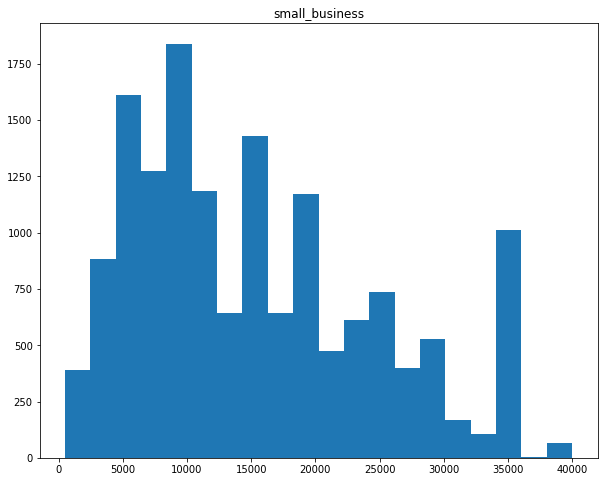

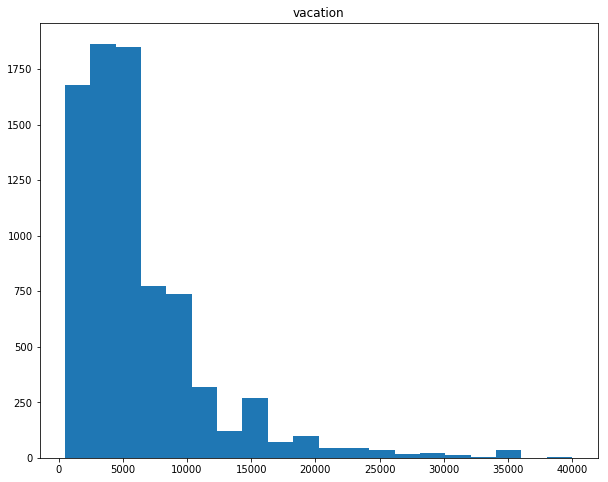

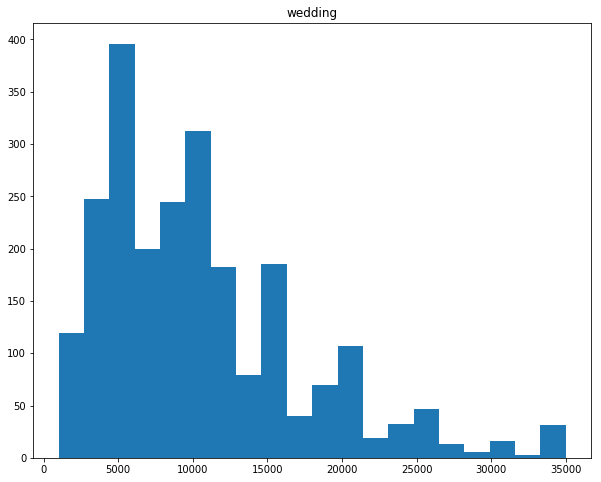

In [155]:
primary_key = 'purpose'
secondary_key = 'loan_amnt'
print(accept_raw[primary_key].unique())
for val in sorted(accept_raw[primary_key].unique()):
    temp = accept_raw[accept_raw[primary_key] == val][[secondary_key]]
    plt.figure(figsize = (10, 8))
    _ = plt.hist(temp[secondary_key], bins = 20)
    plt.title(val, fontdict=None, loc='center')

['B' 'C' 'A' 'E' 'F' 'D' 'G']


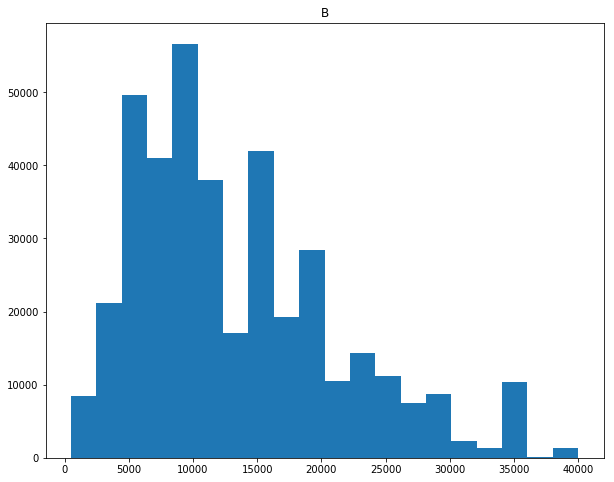

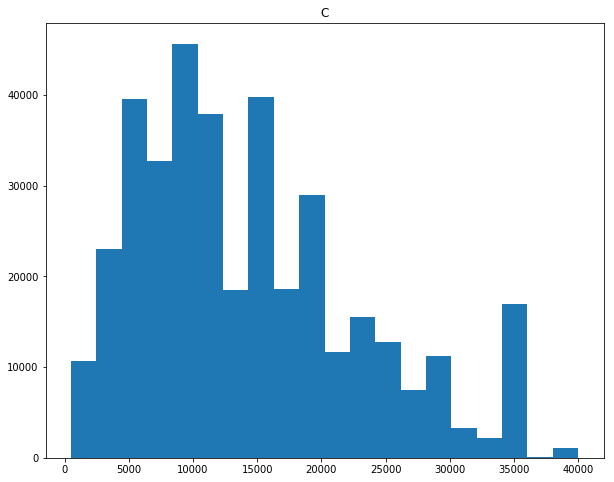

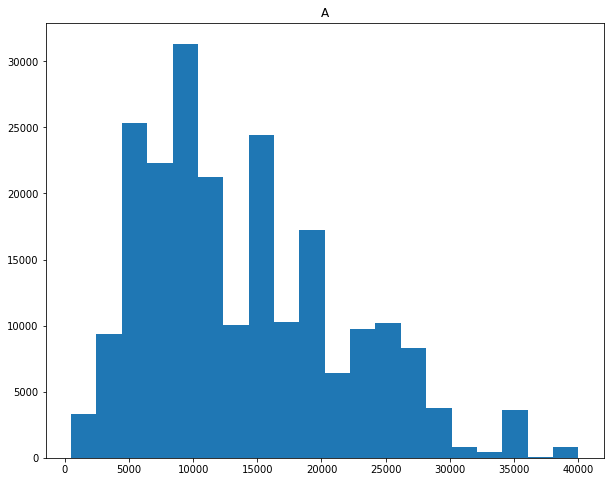

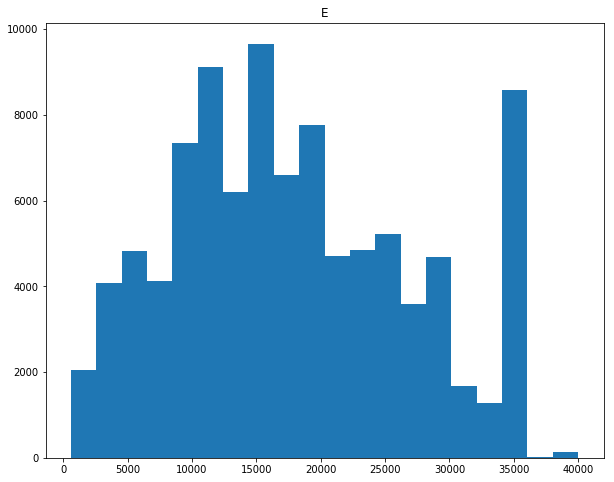

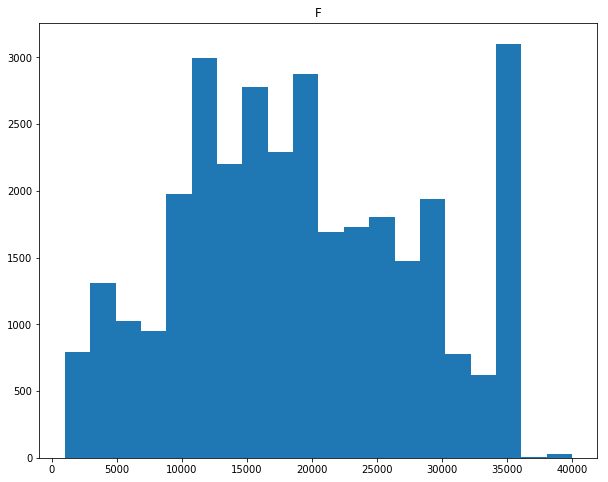

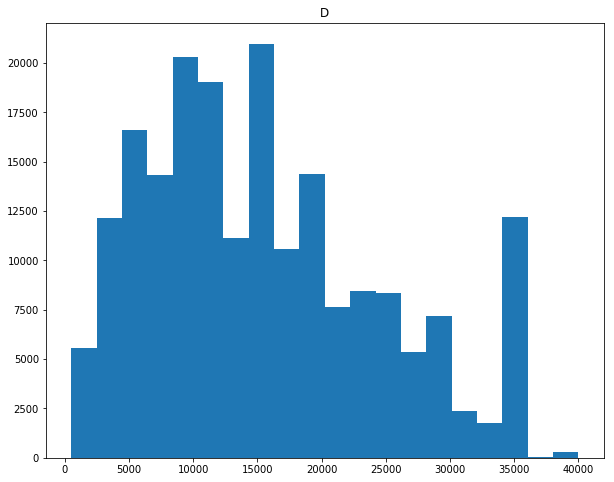

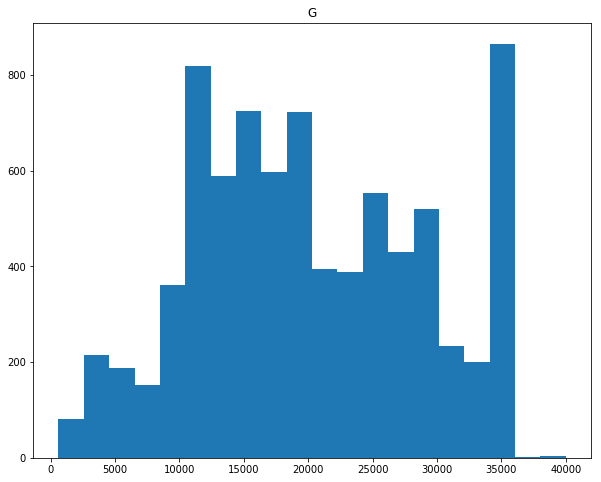

In [142]:
primary_key = 'grade'
secondary_key = 'loan_amnt'
print(accept_raw[primary_key].unique())
for val in accept_raw[primary_key].unique():
    temp = accept_raw[accept_raw[primary_key] == val][[secondary_key]]
    plt.figure(figsize = (10, 8))
    _ = plt.hist(temp[secondary_key], bins = 20)
    plt.title(val, fontdict=None, loc='center')

In [143]:
accept_raw['loan_status'].value_counts()

Current                                                783839
Fully Paid                                             396204
Charged Off                                             96554
Late (31-120 days)                                      20073
In Grace Period                                         10210
Issued                                                   6048
Late (16-30 days)                                        4555
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1615
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [158]:
#accept_raw[accept_raw['loan_status'] == 'In Grace Period']['issue_d'].value_counts()

In [152]:
accept_raw['loan_amt_log'] = accept_raw['loan_amnt'].apply(lambda x: int(np.log2(x)))

In [153]:
accept_raw['loan_amt_log'].value_counts()

13    502768
14    402104
12    257041
11     70792
15     65408
10     19136
9       4587
8         11
Name: loan_amt_log, dtype: int64

In [161]:
accept_status = accept_raw[~accept_raw['loan_status'].isin(['Current', 'In Grace Period', 'Issued'])]

Count by primary key:  loan_amt_log
13    202569
14    148889
12    106823
11     30458
15     22767
10      8349
9       1884
8         11
Name: loan_amt_log, dtype: int64
------------------------------------
Count by loan_amt_log (primary key) and loan_status (secondary key)
                                                                     id
loan_amt_log loan_status                                               
8            Does not meet the credit policy. Status:Charged...       1
             Does not meet the credit policy. Status:Fully Paid       5
             Fully Paid                                               5
9            Charged Off                                            230
             Default                                                  5
             Does not meet the credit policy. Status:Charged...      12
             Does not meet the credit policy. Status:Fully Paid      29
             Fully Paid                                            1553
  

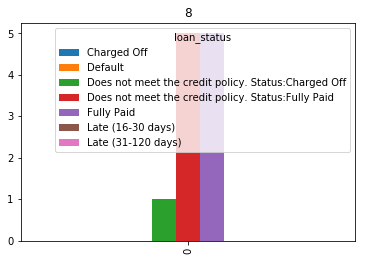

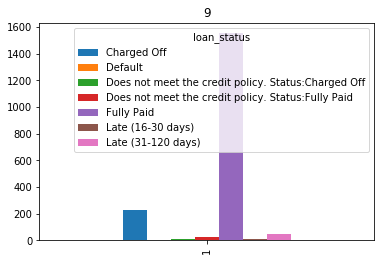

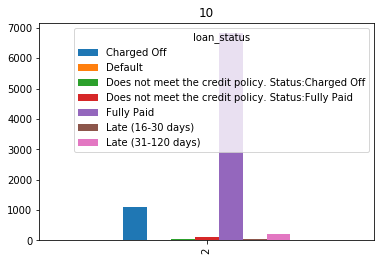

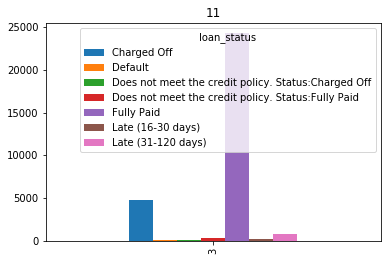

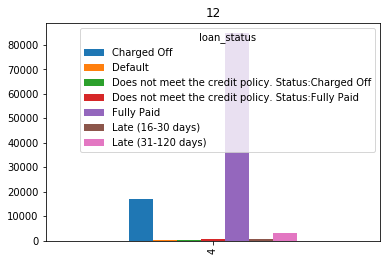

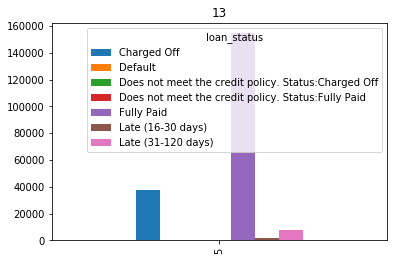

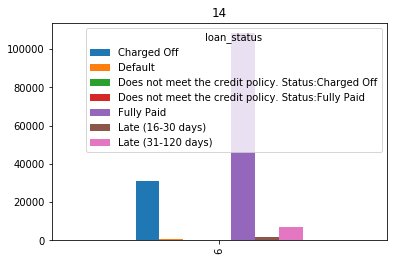

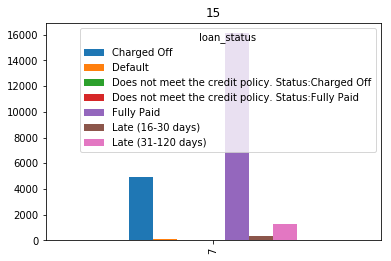

In [164]:
df = accept_status
primary_key = 'loan_amt_log'
secondary_key = 'loan_status'
getDistribution(df, primary_key, secondary_key)

### Question:
- For borrowers, the most important factor is **interest rate** charged.
- Provide insights on the **interest rates** dependence on loan grade/subgrade and term (36 or 60 months).
- If the analysis is refined by separating loans with different start months 
(the year-month loan issuance date), report your finding.
- Any rational explanation on why the **interest rate** should be grade/sub-grade 
dependent?
- Any rational explanation on the time series variations of interest rates?
- Any rational explanation why the interest rate rise w.r.t. loan term?

In [167]:
accept_raw.term.value_counts()

 36 months    944664
 60 months    377183
Name: term, dtype: int64

[' 36 months' ' 60 months']


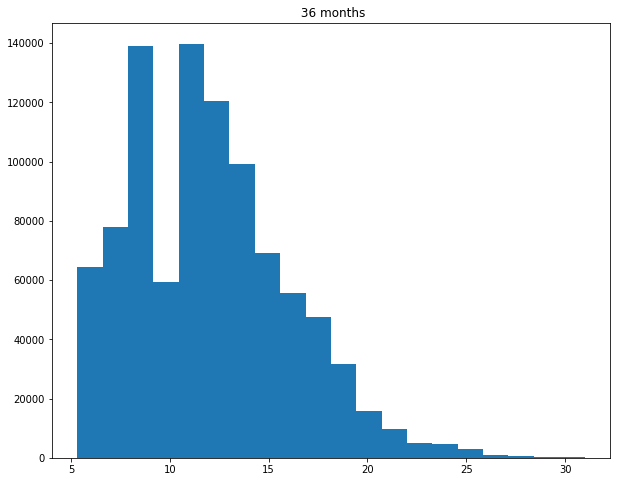

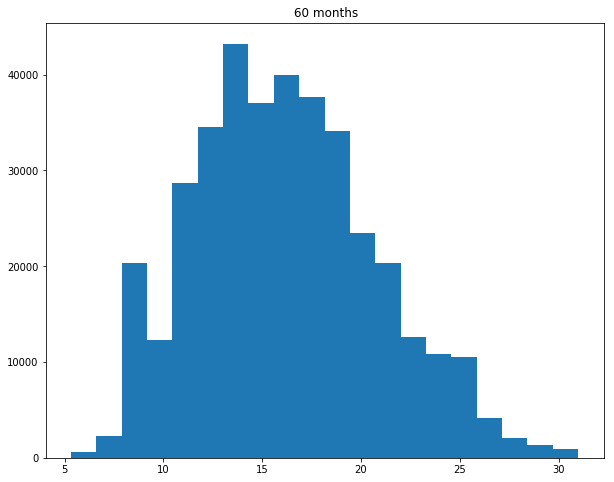

In [168]:
primary_key = 'term'
secondary_key = 'int_rate'
print(accept_raw[primary_key].unique())
for val in sorted(accept_raw[primary_key].unique()):
    temp = accept_raw[accept_raw[primary_key] == val][[secondary_key]]
    plt.figure(figsize = (10, 8))
    _ = plt.hist(temp[secondary_key], bins = 20)
    plt.title(val, fontdict=None, loc='center')

['B' 'C' 'A' 'E' 'F' 'D' 'G']


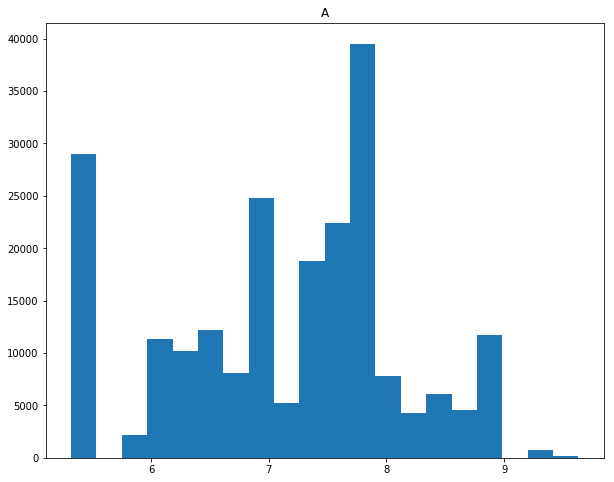

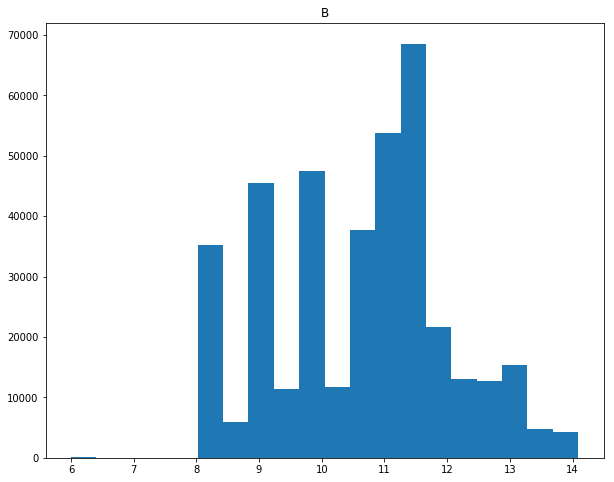

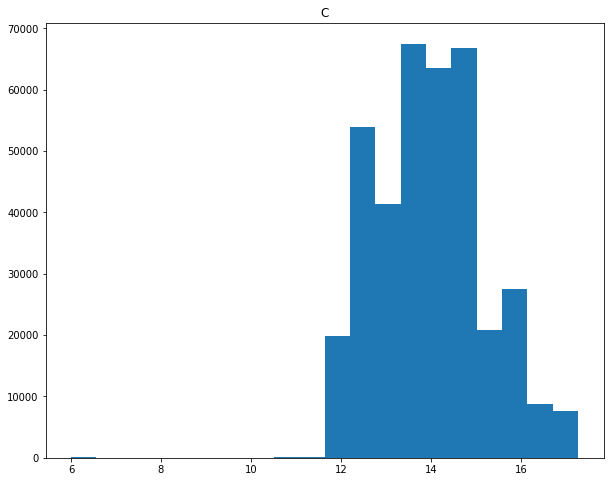

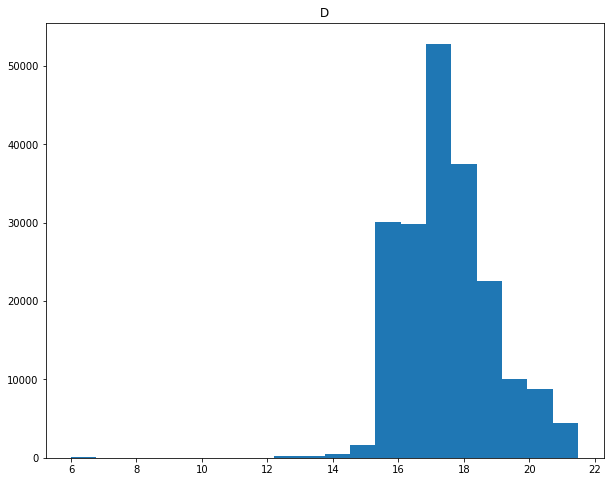

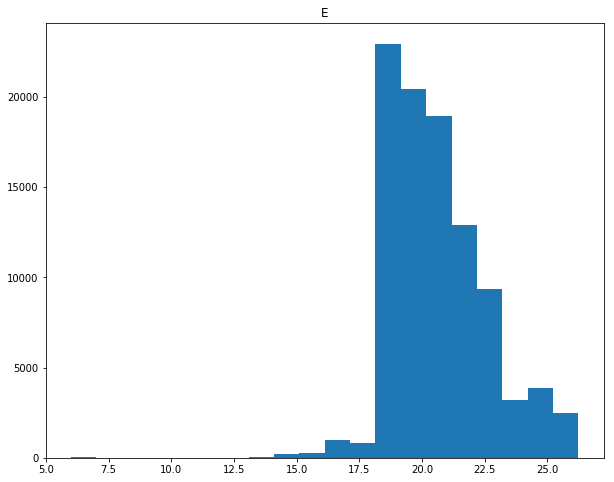

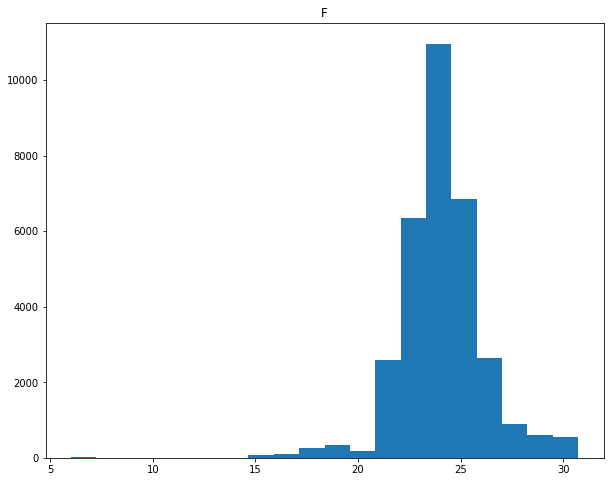

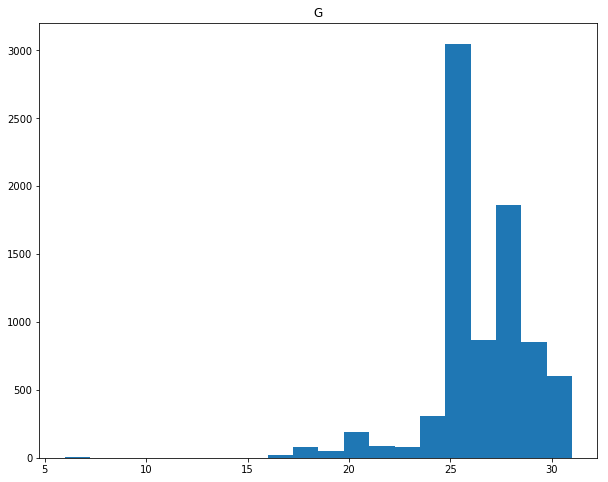

In [225]:
primary_key = 'grade'
secondary_key = 'int_rate'
print(accept_raw[primary_key].unique())
for val in sorted(accept_raw[primary_key].unique()):
    temp = accept_raw[accept_raw[primary_key] == val][[secondary_key]]
    plt.figure(figsize = (10, 8))
    _ = plt.hist(temp[secondary_key], bins = 20)
    plt.title(val, fontdict=None, loc='center')

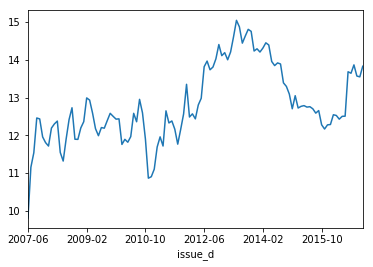

In [211]:
accept_raw.groupby(['issue_d'])['int_rate'].mean().plot()

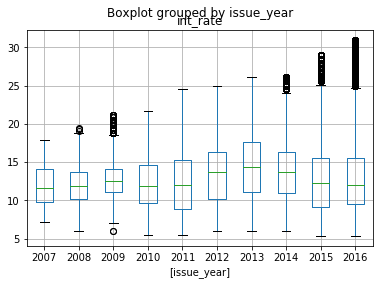

In [221]:
accept_raw[['issue_year', 'int_rate']].boxplot(by='issue_year')

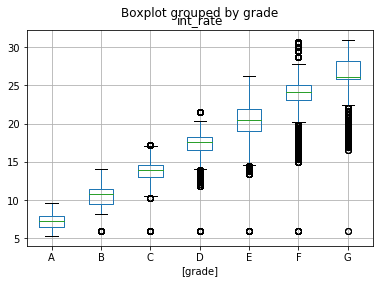

In [229]:
accept_raw[['grade', 'int_rate']].boxplot(by='grade')

### Question:
- For investors, it is crucial to know whether a loan is served to completion (loan_status 'Fully Paid').
- Please analyze the percentages of non-completed loans in each loan grade/subgrade 
(i.e. default, charged off) which go beyond **delinquency**. 
- Provide justification the introduction of loan grade/subgrade.
- Provide justification on the rate hike on riskier loan grade/subgrade.
- What happens to percentage rates of loans involving settlement?
- Make sure that your analysis takes into account of **loan-term**.


### Question:
- For investors, the **amortization process** returns the partial principal and 
monthly interest in a single montly installment payment.
- Because the borrower can pre-pay the principal at-will or go belly-up (delinquent or default) at any
moment within the loan term, it may shorten the loan duration un-expectedly or
cause losses to the investors.
- Thus it is vital for the investors to know the general pattern of loan-prepayment
or delinquency (early stage leading to default or eventual charged off).
- Please compute the actual durations of loans (last_payment_date - issuance_date)
and 
    - analyze the pattern debtors terminate the loans before loan maturity 
    (either 'fully paid', or stop paying henceforth).
    - Please include 'term', 'loan-grade/sub-grade' in your analysis.
- Do you see major differences on the patterns with different loan-terms? 
What is the rational explanation for this difference?

- Report the major characteristics of the patterns. 
- Do '60 months' (5 years) loans often get terminated at the end of the 5 years
loan term? Why not?
    
    

In [273]:
df_early_term = accept_raw[(accept_raw['paid_months'] - accept_raw['term'] < 0) & accept_raw['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

In [274]:
df_early_term['loan_status'].value_counts()

Fully Paid     332432
Charged Off     95369
Default          1589
Name: loan_status, dtype: int64

Count by primary key:  term
36    314142
60    115248
Name: term, dtype: int64
------------------------------------
Count by term (primary key) and loan_status (secondary key)
                      id
term loan_status        
36   Charged Off   58254
     Default         955
     Fully Paid   254933
60   Charged Off   37115
     Default         634
     Fully Paid    77499
------------------------------------


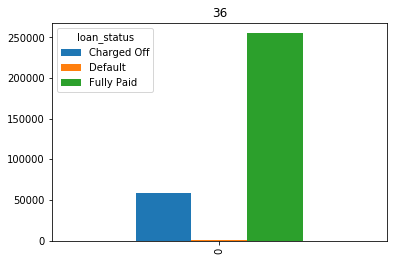

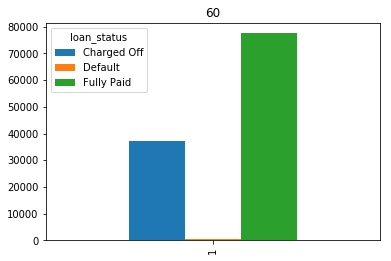

In [276]:
df = df_early_term
primary_key = 'term'
secondary_key = 'loan_status'
getDistribution(df, primary_key, secondary_key)

Count by primary key:  grade
B    119640
C    117959
D     71486
A     64855
E     37453
F     14276
G      3721
Name: grade, dtype: int64
------------------------------------
Count by grade (primary key) and loan_status (secondary key)
                       id
grade loan_status        
A     Charged Off    4926
      Default          79
      Fully Paid    59850
B     Charged Off   17922
      Default         283
      Fully Paid   101435
C     Charged Off   27639
      Default         474
      Fully Paid    89846
D     Charged Off   22474
      Default         350
      Fully Paid    48662
E     Charged Off   14404
      Default         270
      Fully Paid    22779
F     Charged Off    6242
      Default         105
      Fully Paid     7929
G     Charged Off    1762
      Default          28
      Fully Paid     1931
------------------------------------


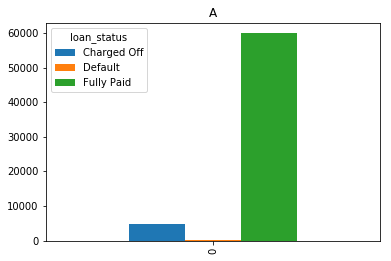

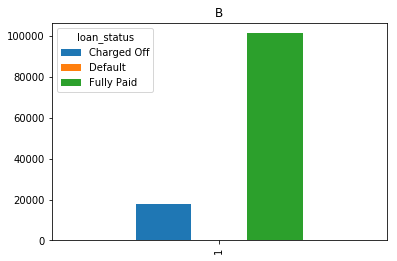

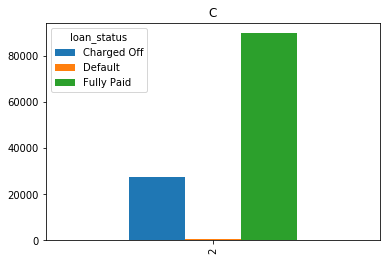

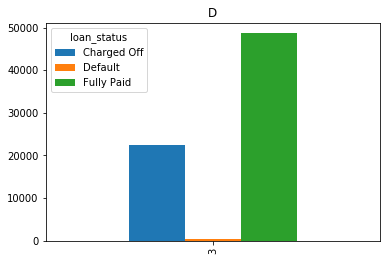

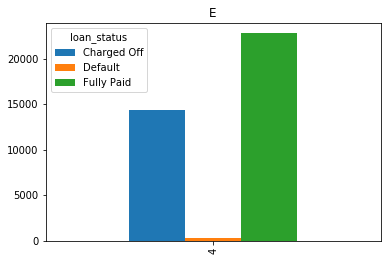

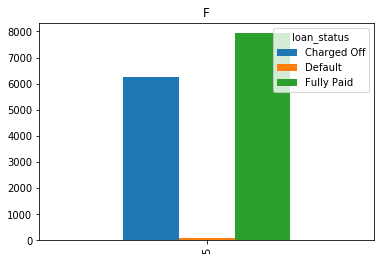

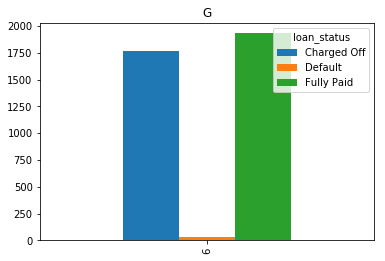

In [275]:
df = df_early_term
primary_key = 'grade'
secondary_key = 'loan_status'
getDistribution(df, primary_key, secondary_key)

In [277]:
# term60_over = accept_raw[(accept_raw['term'] == 60) & accept_raw['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

### Question:
- For investors, the profitability of the loans is of their central 
concern.
- For a given loan, the profit-and-loss (in percentages) can be computed as
the (total_payment - principal)/principal.
- For those loans which are eventually 'Fully Paid', what are the average
returns (or the distributions of returns) of different loan grades/terms?
- For those loans wich are default or beyond, what are the average returns or return distributions?
- What about all the loans which have been 
terminated ('fully paid', 'default', 'charged off')?
- What about the loans which end up in **loan settlement negotiations**?
- Any variation of patterns for different loan purposes?
- What happens if the issuance years are included in your analysis?
- Is there any pattern between loan duration vs return rate?